<a href="https://colab.research.google.com/github/JuanTabarez/Analisis_Numerico_2020_2/blob/master/Dimensionamiento_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curva de carga**




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

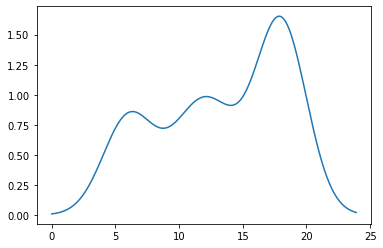

In [19]:
x = np.arange(0,24,0.1)

mean, standard_deviation = 6,2

y1=norm(mean,standard_deviation)
m2,sd2 = 12,2.5
y2=norm(m2,sd2)
m3,sd3 = 18,2
y3 = norm(m3,sd3)

#plt.plot(x,4*y1.pdf(x))
#plt.plot(x,6*y2.pdf(x))
#plt.plot(x,8*y3.pdf(x))

demanda = 4*y1.pdf(x) + 6*y2.pdf(x) + 8*y3.pdf(x)

plt.plot(x,demanda)


In [20]:
print(x,demanda)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

In [21]:
print(demanda.sum())

179.83315257881026


# **Curva de generacion**

[0.00000000e+00 4.80096019e-03 9.60192038e-03 ... 2.39903981e+01
 2.39951990e+01 2.40000000e+01]


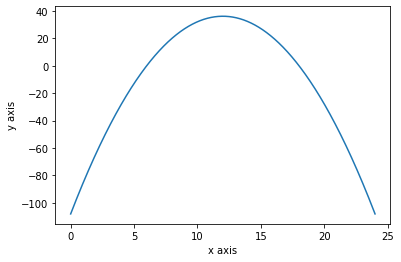

In [53]:
from matplotlib.pyplot import *
from numpy import *
x=linspace(0,24,5000)
y=-(x-6)*(x-18)
plot(x,y)
xlabel("x axis")
ylabel("y axis")
print(x)
show()


In [55]:
pip install pvlib

     |████████████████████████████████| 22.3MB 1.5MB/s 


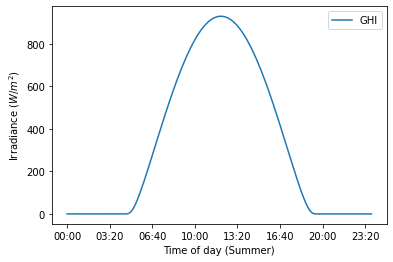

In [79]:
from pvlib import location
from pvlib import irradiance
import pandas as pd
from matplotlib import pyplot as plt


tz = 'MST'
lat, lon = 39.755, -105.221

#Crear la localizacion, lat, lon, timezone

site = location.Location(lat, lon, tz=tz)


# Definir una función para que podamos reutilizar la secuencia 
# de operaciones con diferentes ubicaciones.

def get_irradiance(site_location, date, tilt, surface_azimuth):
    # Crear intervalos de 10 minutos para un día

    times = pd.date_range(date, freq='10min', periods=6*24,
                          tz=site_location.tz)
    
   #  Genere datos claros usando el modelo Ineichen, que es el predeterminado 
   #  El método get_clearsky devuelve un marco de datos con valores para 
   #  GHI, DNI y DHI
    clearsky = site_location.get_clearsky(times)
    # Obtenga el azimuth solar y el zenith para pasar a la función de transposición
    solar_position = site_location.get_solarposition(times=times)
    # Utilice la función get_total_irradiance para transponer el GHI a POA
    POA_irradiance = irradiance.get_total_irradiance(
        surface_tilt=tilt,
        surface_azimuth=surface_azimuth,
        dni=clearsky['dni'],
        ghi=clearsky['ghi'],
        dhi=clearsky['dhi'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'])
    # Devolver DataFrame con solo GHI y POA
    return pd.DataFrame({'GHI': clearsky['ghi'],
                         'POA': POA_irradiance['poa_global']})


# Obtener datos de irradiancia para el verano e invierno, 
# asumiendo una inclinación de 25 grados y orientado al sur
summer_irradiance = get_irradiance(site, '06-20-2020', 25, 180)
#winter_irradiance = get_irradiance(site, '12-21-2020', 25, 180)

# Convertir índices de marcos de datos en horas: formato de minutos para facilitar el trazado
summer_irradiance.index = summer_irradiance.index.strftime("%H:%M")
#winter_irradiance.index = winter_irradiance.index.strftime("%H:%M")

# Graficar GHI vs POA para invierno y verano
fig, (ax1) = plt.subplots(1, sharey=True)
summer_irradiance['GHI'].plot(ax=ax1, label='GHI')
#summer_irradiance['POA'].plot(ax=ax1, label='POA')
#winter_irradiance['GHI'].plot(ax=ax2, label='GHI')
#winter_irradiance['POA'].plot(ax=ax2, label='POA')
ax1.set_xlabel('Time of day (Summer)')
#ax2.set_xlabel('Time of day (Winter)')
ax1.set_ylabel('Irradiance ($W/m^2$)')
ax1.legend()
#ax2.legend()
plt.show()